# Baseline Model

In [26]:
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
%matplotlib inline

from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [25]:
from keras.preprocessing.image import ImageDataGenerator 

train_data_dir = 'C:/Users/Sam_S/OneDrive/Documents/Data science 2022-2023/Deep learning assignment/seg_train/seg_train' 
test_data_dir = 'C:/Users/Sam_S/OneDrive/Documents/Data science 2022-2023/Deep learning assignment/seg_test/seg_test'
image_generator = ImageDataGenerator(rescale=1/255, validation_split=0.2)    

train_data = image_generator.flow_from_directory(batch_size=64,
                                                 directory=train_data_dir,
                                                 shuffle=True,
                                                 target_size=(64,64), 
                                                 subset="training",
                                                 class_mode='categorical')

val_data = image_generator.flow_from_directory(batch_size=64,
                                                 directory=train_data_dir,
                                                 shuffle=True,
                                                 target_size=(64,64), 
                                                 subset="validation",
                                                 class_mode='categorical')
test_gen = ImageDataGenerator(rescale=1./255)
test_data = test_gen.flow_from_directory(test_data_dir,
                                       target_size=(64,64), batch_size=64, shuffle=False)

Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [27]:
labels= {value: key for key, value in train_data.class_indices.items()}
labels

{0: 'buildings',
 1: 'forest',
 2: 'glacier',
 3: 'mountain',
 4: 'sea',
 5: 'street'}

In [9]:
def create_model():
    model= Sequential([
      Conv2D(filters=64, kernel_size= (3, 3), padding= "same",
              
      input_shape= (64, 64, 3)),
      Activation('relu'),
      MaxPooling2D(pool_size= (2, 2)),
        
      Conv2D(filters=64, kernel_size= (3, 3), padding= "same"),
      Activation('relu'),
      MaxPooling2D(pool_size= (2, 2)),
               
      Conv2D(filters=64, kernel_size= (3, 3), padding= "same"), 
      Activation('relu'),
      MaxPooling2D(pool_size= (2, 2)),
        
      Flatten(),
        
      Dense(units= 64, activation= 'relu'),
      Dense(units= 32, activation= 'relu'),
      Dense(units= 6, activation= 'softmax')])
    
    return model

baseline_model= create_model()
print(baseline_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        1792      
                                                                 
 activation_3 (Activation)   (None, 64, 64, 64)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 activation_4 (Activation)   (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                  

In [10]:
optimizer= Adam(learning_rate= 0.001)
baseline_model.compile(optimizer= optimizer, loss= CategoricalCrossentropy(), metrics= ['accuracy'])

In [11]:
baseline= baseline_model.fit(train_data, epochs=40, batch_size= 32, validation_data=val_data,
                       verbose=2)

Epoch 1/30
176/176 - 47s - loss: 1.1090 - accuracy: 0.5567 - val_loss: 0.9088 - val_accuracy: 0.6519 - 47s/epoch - 269ms/step
Epoch 2/30
176/176 - 60s - loss: 0.8027 - accuracy: 0.6976 - val_loss: 0.7420 - val_accuracy: 0.7315 - 60s/epoch - 343ms/step
Epoch 3/30
176/176 - 106s - loss: 0.6786 - accuracy: 0.7516 - val_loss: 0.6503 - val_accuracy: 0.7685 - 106s/epoch - 600ms/step
Epoch 4/30
176/176 - 148s - loss: 0.5846 - accuracy: 0.7909 - val_loss: 0.6049 - val_accuracy: 0.7882 - 148s/epoch - 843ms/step
Epoch 5/30
176/176 - 194s - loss: 0.5213 - accuracy: 0.8093 - val_loss: 0.5523 - val_accuracy: 0.8049 - 194s/epoch - 1s/step
Epoch 6/30
176/176 - 193s - loss: 0.4714 - accuracy: 0.8313 - val_loss: 0.5211 - val_accuracy: 0.8217 - 193s/epoch - 1s/step
Epoch 7/30
176/176 - 194s - loss: 0.4171 - accuracy: 0.8471 - val_loss: 0.5814 - val_accuracy: 0.7924 - 194s/epoch - 1s/step
Epoch 8/30
176/176 - 192s - loss: 0.3671 - accuracy: 0.8648 - val_loss: 0.5239 - val_accuracy: 0.8231 - 192s/epoch - 

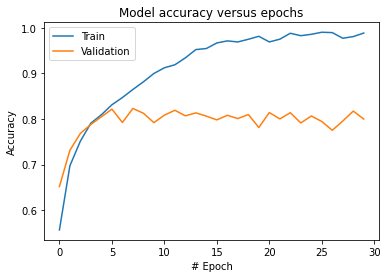

In [15]:
plot.plot(baseline.history['accuracy'])
plot.plot(baseline.history['val_accuracy'])
plot.title('Model accuracy versus epochs')
plot.ylabel('Accuracy')
plot.xlabel('# Epoch')
plot.legend(['Train', 'Validation'], loc= 'upper left')
plot.show()

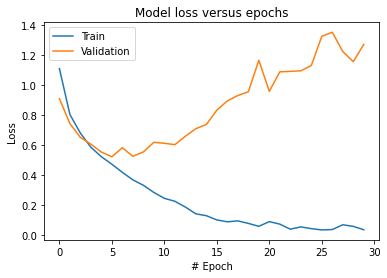

In [16]:
plot.plot(baseline.history['loss'])
plot.plot(baseline.history['val_loss'])
plot.title('Model loss versus epochs')
plot.ylabel('Loss')
plot.xlabel('# Epoch')
plot.legend(['Train', 'Validation'], loc='upper left')
plot.show()

In [17]:
test_loss, test_accuracy = baseline_model.evaluate(test_data, batch_size= 128)

47/47 [==============================] - 17s 365ms/step - loss: 1.2581 - accuracy: 0.8080


In [18]:
test_prediction = baseline_model.predict(test_data)
y_pred = np.argmax(test_prediction, axis=1)
y_true = test_data.classes

47/47 [==============================] - 14s 284ms/step


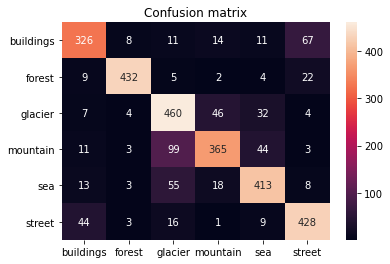

In [19]:
C_M= confusion_matrix(y_true, y_pred)
ax= plot.axes()
sns.heatmap(C_M, annot= True, fmt = "d", xticklabels= labels.values(), yticklabels= labels.values(), ax= ax)
ax.set_title('Confusion matrix')
plot.show()

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
import pandas as pd

res = []
for l in [0,1,2,3,4,5]:
    prec,recall,_,_ = precision_recall_fscore_support(np.array(y_true)==l,
                                                      np.array(y_pred)==l,
                                                      pos_label=True,average=None)
    res.append([l,recall[0],recall[1]])
    

pd.DataFrame(res,columns = ['class','sensitivity','specificity'])

In [20]:
from sklearn.metrics import roc_auc_score 

y_pred = np.argmax(test_prediction, axis=0)
print(roc_auc_score(y_true, test_prediction, multi_class='ovr'))

ROC AUC Score:  0.9628524540185449


In [23]:
from sklearn.preprocessing import label_binarize

y_train = train_data.classes
y_test = test_data.classes

actual_test_labels= test_data.classes
actual_test_labels= label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5])
possible_classes= actual_test_labels.shape[1]


In [24]:
from sklearn.metrics import roc_curve, auc
import seaborn as sns
%matplotlib inline

fp_rates= dict()
tp_rates= dict()
roc_auc= dict()
for i in range(possible_classes):
    fp_rates[i], tp_rates[i], _= roc_curve(actual_test_labels[:, i], test_prediction[:, i])
    roc_auc[i]= auc(fp_rates[i], tp_rates[i])

In [25]:
fp_rates["micro"], tp_rates["micro"], _ = roc_curve(actual_test_labels.ravel(), test_prediction.ravel())
roc_auc["micro"]= auc(fp_rates["micro"], tp_rates["micro"])

all_fp_rates= np.unique(np.concatenate([fp_rates[i] for i in range(possible_classes)]))

mean_tp_rates= np.zeros_like(all_fp_rates)
for i in range(possible_classes):
    mean_tp_rates += np.interp(all_fp_rates, fp_rates[i], tp_rates[i])

In [26]:
mean_tp_rates /= possible_classes

fp_rates["macro"]= all_fp_rates
tp_rates["macro"]= mean_tp_rates
roc_auc["macro"]= auc(fp_rates["macro"], tp_rates["macro"])

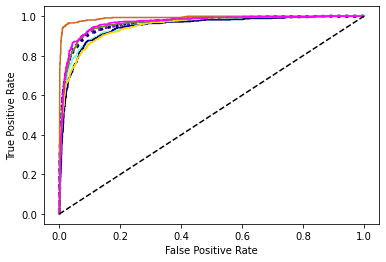

In [27]:
from itertools import cycle

plot.figure()
plot.plot(
    fp_rates["micro"],
    tp_rates["micro"],
    label= "micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color= "darkviolet",
    linewidth=3,
    linestyle= ":",)

plot.plot(
    fp_rates["macro"],
    tp_rates["macro"],
    label= "macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color= "darkblue",
    linewidth=3,
    linestyle= ":",)

colors= cycle(["aquamarine", "chocolate", "navy", "gold", "olivedrab", "fuchsia"])
for i, color in zip(range(possible_classes), colors):
    plot.plot(
        fp_rates[i],
        tp_rates[i],
        color= color,
        label= "ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]), )

plot.plot([0, 1], [0, 1], "k--")
plot.xlabel("False Positive Rate")
plot.ylabel("True Positive Rate")
plot.legend()
plot.show()

# Tuned model

In [ ]:
from tensorflow import keras
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, MaxPooling2D, BatchNormalization

### Main model: best performing model in terms of accuracy and loss

tuned_model = keras.Sequential()
tuned_model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape = (64, 64, 3), padding = 'same'))
tuned_model.add(BatchNormalization())
tuned_model.add(keras.layers.MaxPooling2D((2, 2), strides = 2))

tuned_model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', padding = 'same'))
tuned_model.add(BatchNormalization())
tuned_model.add(keras.layers.MaxPooling2D((2, 2), strides = 2))

tuned_model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', padding = 'same'))
tuned_model.add(BatchNormalization())
tuned_model.add(keras.layers.MaxPooling2D((2, 2), strides = 2))

tuned_model.add(keras.layers.Flatten())

tuned_model.add(keras.layers.Dense(32, activation = 'relu', kernel_regularizer=regularizers.L1L2(l1=0.001, l2=0.001)))
tuned_model.add(BatchNormalization())
tuned_model.add(Dropout(0.45))
tuned_model.add(keras.layers.Dense(6, activation = 'softmax'))

tuned_model.summary()

In [7]:
### Best model in terms of fitting

#tuned_model = keras.Sequential()

#tuned_model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape = (64, 64, 3), padding = 'same'))
#tuned_model.add(layers.MaxPooling2D((2, 2), strides =2, padding = 'same', ))

#tuned_model.add(layers.Conv2D(64, (3, 3), activation='relu', padding = 'same'))
#tuned_model.add(layers.MaxPooling2D((2, 2), strides =2, padding = 'same'))

#tuned_model.add(layers.Conv2D(64, (3, 3), activation='relu', padding = 'same', ))
#tuned_model.add(layers.MaxPooling2D((2, 2) , strides =2, padding = 'same'))

#tuned_model.add(layers.Flatten())
#tuned_model.add(layers.Dense(64, activation = 'relu', kernel_regularizer=regularizers.L1L2(l1=0.001, l2=0.001)))
#tuned_model.add(Dropout(0.45))
#tuned_model.add(layers.Dense(6, activation = 'softmax'))

#tuned_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 64)         0

In [8]:
reduce_lr = ReduceLROnPlateau( monitor= 'val_loss', patience= 2)            
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10)

In [9]:
from tensorflow.keras.optimizers import RMSprop

optimizer= Adam( learning_rate= 0.001 )
#optimizer= RMSprop( learning_rate = 0.001)

tuned_model.compile( optimizer= optimizer, loss = CategoricalCrossentropy(), metrics= ['accuracy'] )

In [10]:
tuned= tuned_model.fit(train_data, epochs= 40, batch_size= 32, validation_data= val_data,
                       verbose = 2, 
                       callbacks=[early_stopping, reduce_lr])

Epoch 1/40
176/176 - 154s - loss: 2.0010 - accuracy: 0.4839 - val_loss: 1.2327 - val_accuracy: 0.5952 - lr: 0.0010 - 154s/epoch - 874ms/step
Epoch 2/40
176/176 - 148s - loss: 1.2356 - accuracy: 0.5858 - val_loss: 1.1583 - val_accuracy: 0.6216 - lr: 0.0010 - 148s/epoch - 839ms/step
Epoch 3/40
176/176 - 149s - loss: 1.1419 - accuracy: 0.6291 - val_loss: 1.1001 - val_accuracy: 0.6530 - lr: 0.0010 - 149s/epoch - 848ms/step
Epoch 4/40
176/176 - 149s - loss: 1.0879 - accuracy: 0.6619 - val_loss: 0.9714 - val_accuracy: 0.7175 - lr: 0.0010 - 149s/epoch - 847ms/step
Epoch 5/40
176/176 - 152s - loss: 1.0393 - accuracy: 0.6830 - val_loss: 0.9542 - val_accuracy: 0.7193 - lr: 0.0010 - 152s/epoch - 864ms/step
Epoch 6/40
176/176 - 152s - loss: 0.9966 - accuracy: 0.6992 - val_loss: 0.9448 - val_accuracy: 0.7315 - lr: 0.0010 - 152s/epoch - 866ms/step
Epoch 7/40
176/176 - 150s - loss: 0.9723 - accuracy: 0.7158 - val_loss: 0.8846 - val_accuracy: 0.7432 - lr: 0.0010 - 150s/epoch - 850ms/step
Epoch 8/40
17

In [ ]:
### Creating an expanded training dataset that contains the training- and validation data

#image_generator2 = ImageDataGenerator(rescale=1/255)

#train_data_large = image_generator.flow_from_directory(batch_size=64,
#                                                 directory=train_data_dir,
#                                                 shuffle=True,
#                                                 target_size=(64,64), 
#                                                 #subset="training",
#                                                 class_mode='categorical')

### training the model on the expanded training set

#tuned= tuned_model.fit(train_data, epochs= 40, batch_size= 32, validation_data= val_data,
#                       verbose = 2, 
#                       callbacks=[early_stopping, reduce_lr])

### making plots of the model
#plot.plot(tuned.history['accuracy'])
#plot.title('Model accuracy versus epochs')
#plot.ylabel('Accuracy')
#plot.xlabel('# Epoch')
#plot.legend(['Train'], loc='upper left')
#plot.show()

#plot.plot(tuned.history['loss'])
#plot.title('Model loss versus epochs')
#plot.ylabel('Loss')
#plot.xlabel('# Epoch')
#plot.legend(['Train'], loc='upper left')
#plot.show()


### training the model on the expanded training set
# test_loss, test_accuracy = tuned_model.evaluate(test_data, batch_size= 64)

#test_prediction = tuned_model.predict(test_data)

#y_pred = np.argmax(test_prediction, axis=1)
#y_true = test_data.classes

#C_M= confusion_matrix(y_true, y_pred)
#ax= plot.axes()
#sns.heatmap(C_M, annot= True, fmt = "d", xticklabels= labels.values(), yticklabels= labels.values(), ax= ax)
#ax.set_title('Confusion matrix')
#plot.show()

#mean_tp_rates /= possible_classes

#fp_rates["macro"]= all_fp_rates
#tp_rates["macro"]= mean_tp_rates
#roc_auc["macro"]= auc(fp_rates["macro"], tp_rates["macro"])

#plot.figure()
#plot.plot(
#    fp_rates["micro"],
#    tp_rates["micro"],
#    label= "micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
#    color= "darkviolet",
#    linewidth=3,
#    linestyle= ":",)

#plot.plot(
#    fp_rates["macro"],
#    tp_rates["macro"],
#    label= "macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
#    color= "darkblue",
#    linewidth=3,
#    linestyle= ":",)

#colors= cycle(["aquamarine", "chocolate", "navy", "gold", "olivedrab", "fuchsia"])
#for i, color in zip(range(possible_classes), colors):
#    plot.plot(
#        fp_rates[i],
#        tp_rates[i],
#        color= color,
#        label= "ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]), )

#plot.plot([0, 1], [0, 1], "k--")
#plot.xlabel("False Positive Rate")
#plot.ylabel("True Positive Rate")
#plot.legend()
#plot.show()

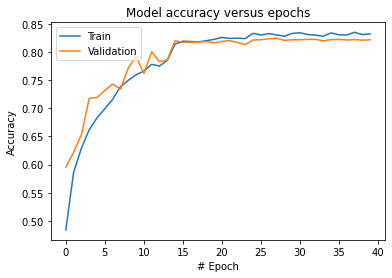

In [11]:
plot.plot(baseline.history['accuracy'])
plot.plot(baseline.history['val_accuracy'])
plot.title('Model accuracy versus epochs')
plot.ylabel('Accuracy')
plot.xlabel('# Epoch')
plot.legend(['Train', 'Validation'], loc= 'upper left')
plot.show()

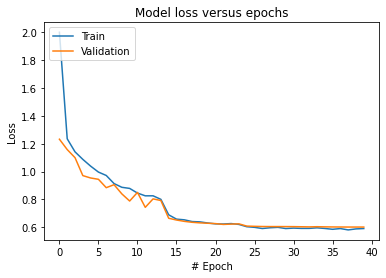

In [12]:
plot.plot(baseline.history['loss'])
plot.plot(baseline.history['val_loss'])
plot.title('Model loss versus epochs')
plot.ylabel('Loss')
plot.xlabel('# Epoch')
plot.legend(['Train', 'Validation'], loc='upper left')
plot.show()

In [13]:
test_loss, test_accuracy = tuned_model.evaluate(test_data, batch_size= 64)

47/47 [==============================] - 5s 106ms/step - loss: 0.6014 - accuracy: 0.8253


47/47 [==============================] - 6s 129ms/step


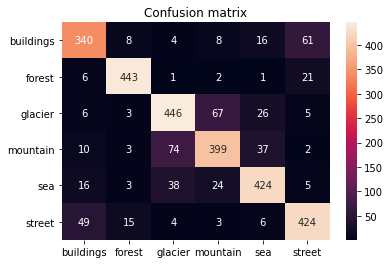

In [16]:
test_prediction = tuned_model.predict(test_data)

y_pred = np.argmax(test_prediction, axis=1)
y_true = test_data.classes

C_M= confusion_matrix(y_true, y_pred)
ax= plot.axes()
sns.heatmap(C_M, annot= True, fmt = "d", xticklabels= labels.values(), yticklabels= labels.values(), ax= ax)
ax.set_title('Confusion matrix')
plot.show()

In [2]:
y_pred = np.argmax(test_prediction, axis=0)
print(roc_auc_score(y_true, test_prediction, multi_class='ovr'))

NameError: name 'np' is not defined

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
import pandas as pd

res = []
for l in [0,1,2,3,4,5]:
    prec,recall,_,_ = precision_recall_fscore_support(np.array(y_true)==l,
                                                      np.array(y_pred)==l,
                                                      pos_label=True,average=None)
    res.append([l,recall[0],recall[1]])
    

pd.DataFrame(res,columns = ['class','sensitivity','specificity'])

In [42]:
y_test = test_data.classes
actual_test_labels= test_data.classes
actual_test_labels= label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5])
possible_classes= actual_test_labels.shape[1]

In [1]:
mean_tp_rates /= possible_classes

fp_rates["macro"]= all_fp_rates
tp_rates["macro"]= mean_tp_rates
roc_auc["macro"]= auc(fp_rates["macro"], tp_rates["macro"])

plot.figure()
plot.plot(
    fp_rates["micro"],
    tp_rates["micro"],
    label= "micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color= "darkviolet",
    linewidth=3,
    linestyle= ":",)

plot.plot(
    fp_rates["macro"],
    tp_rates["macro"],
    label= "macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color= "darkblue",
    linewidth=3,
    linestyle= ":",)

colors= cycle(["aquamarine", "chocolate", "navy", "gold", "olivedrab", "fuchsia"])
for i, color in zip(range(possible_classes), colors):
    plot.plot(
        fp_rates[i],
        tp_rates[i],
        color= color,
        label= "ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]), )

plot.plot([0, 1], [0, 1], "k--")
plot.xlabel("False Positive Rate")
plot.ylabel("True Positive Rate")
plot.legend(loc= 'upper left')
plot.show()

NameError: name 'mean_tp_rates' is not defined

# VGG 16 Model

In [28]:
from tensorflow.keras.applications import VGG16

### Source for the weights used: 
### https://github.com/zdata-inc/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

path= 'C:/Users/Sam_S/OneDrive/Documents/Data science 2022-2023/Deep learning assignment/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'

pretrained_weights_model= VGG16(input_shape= (64, 64, 3), 
                        include_top= False, 
                        weights= None)
pretrained_weights_model.load_weights(path)

for layer in pretrained_weights_model.layers:
     layer.trainable= False

In [29]:
from tensorflow.keras import Model

final_output = pretrained_weights_model.get_layer('block5_pool').output

x= tf.keras.layers.GlobalMaxPooling2D()(final_output)
x= tf.keras.layers.Dense(1024, activation='relu')(x)  
x= tf.keras.layers.Dropout(0.2)(x)                         
x= tf.keras.layers.Dense(6, activation='softmax')(x)       

new_model_vgg = Model(pretrained_weights_model.input, x) 

In [ ]:
new_model_vgg.compile(optimizer = Adam(learning_rate=0.001), loss=CategoricalCrossentropy(), metrics = ["accuracy"])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10)

vgg_model = new_model_vgg.fit(train_data, epochs=40, batch_size= 32, validation_data=val_data,
                       verbose=2,
                       callbacks=[early_stopping, reduce_lr])

Epoch 1/40
176/176 - 452s - loss: 0.7024 - accuracy: 0.7325 - val_loss: 0.5786 - val_accuracy: 0.7867 - lr: 0.0010 - 452s/epoch - 3s/step
Epoch 2/40
176/176 - 444s - loss: 0.5231 - accuracy: 0.8061 - val_loss: 0.5752 - val_accuracy: 0.7924 - lr: 0.0010 - 444s/epoch - 3s/step
Epoch 3/40
176/176 - 451s - loss: 0.4779 - accuracy: 0.8237 - val_loss: 0.6287 - val_accuracy: 0.7671 - lr: 0.0010 - 451s/epoch - 3s/step
Epoch 4/40
176/176 - 402s - loss: 0.4510 - accuracy: 0.8327 - val_loss: 0.5341 - val_accuracy: 0.8081 - lr: 0.0010 - 402s/epoch - 2s/step
Epoch 5/40
176/176 - 375s - loss: 0.4158 - accuracy: 0.8454 - val_loss: 0.5161 - val_accuracy: 0.8192 - lr: 0.0010 - 375s/epoch - 2s/step
Epoch 6/40
176/176 - 366s - loss: 0.3931 - accuracy: 0.8558 - val_loss: 0.4971 - val_accuracy: 0.8299 - lr: 0.0010 - 366s/epoch - 2s/step
Epoch 7/40


In [ ]:
test_loss, test_accuracy = new_model_vgg.evaluate(test_data, batch_size= 64)

In [ ]:
plot.plot(vgg_model.history['accuracy'])
plot.plot(vgg_model.history['val_accuracy'])
plot.title('Model accuracy versus epochs')
plot.ylabel('Accuracy')
plot.xlabel('# Epoch')
plot.legend(['Train', 'Validation'], loc= 'upper left')
plot.show()

In [ ]:
plot.plot(vgg_model.history['loss'])
plot.plot(vgg_model.history['val_loss'])
plot.title('Model loss versus epochs')
plot.ylabel('Loss')
plot.xlabel('# Epoch')
plot.legend(['Train', 'Validation'], loc='upper left')
plot.show()

In [ ]:
vgg_test_prediction= new_model_vgg.predict(test_data)

y_pred= np.argmax(vgg_test_prediction, axis=1)
y_true= test_data.classes

In [ ]:
C_M= confusion_matrix(y_true, y_pred)
ax= plot.axes()
sns.heatmap(C_M, annot= True, fmt= "d", xticklabels= labels.values(), yticklabels= labels.values(), ax= ax)
ax.set_title('Confusion matrix')
plot.show()

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
import pandas as pd

res = []
for l in [0,1,2,3,4,5]:
    prec,recall,_,_ = precision_recall_fscore_support(np.array(y_true)==l,
                                                      np.array(y_pred)==l,
                                                      pos_label=True,average=None)
    res.append([l,recall[0],recall[1]])
    

pd.DataFrame(res,columns = ['class','sensitivity','specificity'])

In [ ]:
print(roc_auc_score(y_true, vgg_test_prediction, multi_class= 'ovr'))

In [ ]:
y_train= train_data.classes
y_test= test_data.classes

vgg_test_prediction= new_model_vgg.predict(test_data)
actual_test_labels= test_data.classes

actual_test_labels= label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5])
possible_classes= actual_test_labels.shape[1]

In [ ]:
fp_rates= dict()
tp_rates= dict()
roc_auc= dict()
for i in range(possible_classes):
    fp_rates[i], tp_rates[i], _= roc_curve(actual_test_labels[:, i], vgg_test_prediction[:, i])
    roc_auc[i]= auc(fp_rates[i], tp_rates[i])
    
fp_rates["micro"], tp_rates["micro"], _ = roc_curve(actual_test_labels.ravel(), vgg_test_prediction.ravel())
roc_auc["micro"]= auc(fp_rates["micro"], tp_rates["micro"])

all_fp_rates= np.unique(np.concatenate([fp_rates[i] for i in range(possible_classes)]))

mean_tp_rates= np.zeros_like(all_fp_rates)
for i in range(possible_classes):
    mean_tp_rates += np.interp(all_fp_rates, fp_rates[i], tp_rates[i])
    
mean_tp_rates /= possible_classes

fp_rates["macro"]= all_fp_rates
tp_rates["macro"]= mean_tp_rates
roc_auc["macro"]= auc(fp_rates["macro"], tp_rates["macro"])

In [ ]:
plot.figure()
plot.plot(
    fp_rates["micro"],
    tp_rates["micro"],
    label= "micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color= "darkviolet",
    linewidth=3,
    linestyle= ":",)

plot.plot(
    fp_rates["macro"],
    tp_rates["macro"],
    label= "macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color= "darkblue",
    linewidth=3,
    linestyle= ":",)

colors= cycle(["aquamarine", "chocolate", "navy", "gold", "olivedrab", "fuchsia"])
for i, color in zip(range(possible_classes), colors):
    plot.plot(
        fp_rates[i],
        tp_rates[i],
        color= color,
        label= "ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]), )

plot.plot([0, 1], [0, 1], "k--")
plot.xlabel("False Positive Rate")
plot.ylabel("True Positive Rate")
plot.legend()
plot.show()